In [1]:
import sys
sys.path.append('../wec-grid-code') # 
import pandas as pd
import wec_grid_class as wg
import matplotlib.pyplot as plt
import numpy as np
import sqlite3
plt.rcParams["figure.figsize"] = (15,10)

    Sets PSSE environment to latest minor version among installed versions of PSSE 35.
    Use psse35.set_minor(n) to set PSSE35 minor version (n) to use.
        Example, for PSSE 35.0.x, use this as: psse35.set_minor(0)

 Input error detected at !
 -m ipykernel_launcher -f C:\Users\barajale\AppData\Roaming\jupyter\runtime\kernel-95843d4b-250f-4b52-9401-2af036c17023.json
                          !

 PSS(R)E Xplore Version 35
 Copyright (c) 1976-2022
 Siemens Industry, Inc.,
 Power Technologies International                            (PTI)
 This program is a confidential  unpublished  work  created  and  first
 licensed in 1976.  It is a trade secret which is the property of  PTI.
 All use,  disclosure,  and/or reproduction not specifically authorized
 by  PTI  is prohibited.   This  program is protected  under  copyright
 laws  of  non-U.S.  countries  and  by  application  of  international
 treaties.  All  Rights  Reserved  Under  The  Copyright  Laws.


           SIEMENS POWER T

In [3]:
# Read in case file 
case14 = r"../input_files/case6.raw"

In [4]:
# initalize WEC GRID Object
pf = wg.Wec_grid(case14)


 Reading IC, SBASE, REV, XFRRAT, NXFRAT, BASFRQ...

 Converting RAW data from PSS(R)E 33 to PSS(R)E 34 format
 Starting processing of Case identification data records
 Finished processing of 3 records for Case identification data
 Starting processing of Bus data records
 Finished processing of 6 records for Bus data
 Starting processing of Load data records
 Finished processing of 3 records for Load data
 Starting processing of Fixed shunt data records
 Finished processing of 0 records for Fixed shunt data
 Starting processing of Generator data records
 Finished processing of 3 records for Generator data
 Starting processing of Branch data records
 Finished processing of 11 records for Branch data
 Finished processing of 0 records for System switching device data
 Starting processing of Transformer data records
 Finished processing of 0 records for 0 Transformer data
 Starting processing of Area data records
 Finished processing of 0 records for Area data
 Starting processing of Two-t

In [5]:
# Run first Power Flow and get bus values
pf.run_powerflow
pf.get_values(['BASE', 'PU', 'ANGLED', 'P', 'Q'])
print(pf.dataframe)

     Bus   BASE    PU  ANGLED  Type          P          Q
0  BUS 1  230.0  1.05     0.0     3  10.533303  33.326514
1  BUS 2  230.0  1.05     0.0     2  32.819427  61.482005
2  BUS 3  230.0  1.07     0.0     2  27.010990  96.557066
3  BUS 4  230.0  1.00     0.0     1 -25.882328 -70.529350
4  BUS 5  230.0  1.00     0.0     1 -19.393265 -67.255283
5  BUS 6  230.0  1.00     0.0     1 -21.256638 -96.079435


In [6]:
from IPython.display import IFrame
IFrame(src="https://matpower.app", width='100%', height='600px')

In [7]:
# connect to Database and open in df
con = sqlite3.connect('../input_files/WEC_database.db')
cur = con.cursor()
wec_gen_values = pd.read_sql_query("SELECT * from WecOutput", con)
wec_gen_values

,Time,ibus,P
0,300.0,1.0,0.020204
1,600.0,1.0,0.013897
2,900.0,1.0,0.018099
3,1200.0,1.0,0.013920
4,1500.0,1.0,0.017861
5,1800.0,1.0,0.018624
6,2100.0,1.0,0.021036
7,2400.0,1.0,0.020560
8,2700.0,1.0,0.018935
9,3000.0,1.0,0.017833


Text(0.5, 1.0, 'WEC: Activate Power Set Points')

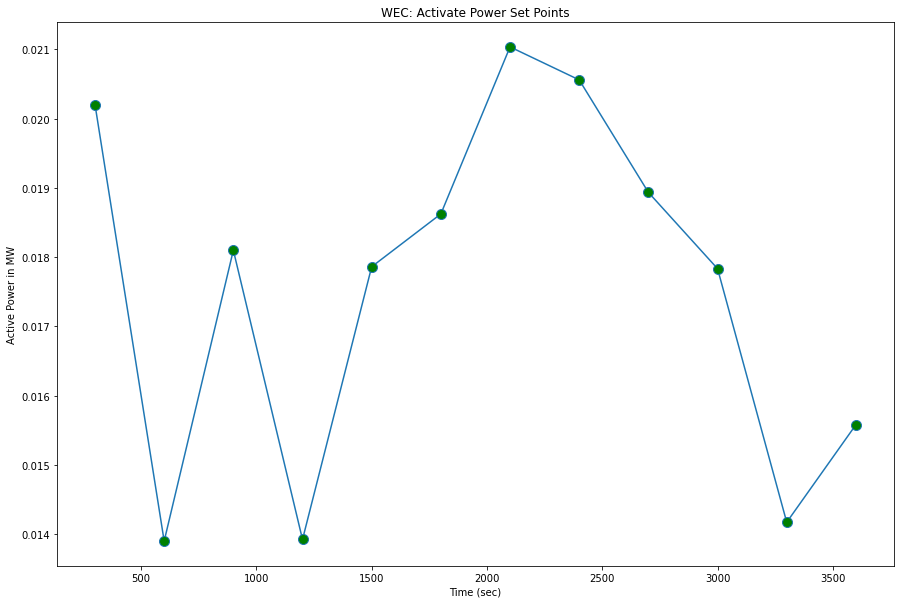

In [8]:
plt.plot(wec_gen_values.Time, wec_gen_values.P, marker="o", markersize=10, markerfacecolor="green")
plt.xlabel("Time (sec)")
plt.ylabel("Active Power in MW")
plt.title("WEC: Activate Power Set Points")

In [9]:
time = [] 
history_swing = []
history_injection = []
history_df = []
history = []
wec_bus = 3
for i in range(len(wec_gen_values)):
    print("Time: {}".format(wec_gen_values.iloc[i].Time))
    print("P setpoint: {}".format(wec_gen_values.iloc[i].P))
    pf.dc_injection(wec_bus, wec_gen_values.iloc[i].P)
    history_swing.append(pf.dataframe.P[0])
    history_injection.append(pf.dataframe.P[wec_bus - 1])
    time.append(wec_gen_values.iloc[i].Time)
    history.append(pf.dataframe)
    print(pf.dataframe)
    print("========================")

Time: 300.0
P setpoint: 0.020203849487166015

 Power flow data changed for machine "1" at bus 3 [BUS 3             ]:
 X--ORIGINAL--X  X-NEW VALUE--X  DATA ITEM
    0.00000        0.202038E-01  PG

 Ordering network...
 Diagonals = 13   Off-diagonals = 22   Maximum size = 36

  ITER       DELTAP      BUS         DELTAQ      BUS        DELTA/V/      BUS       DELTAANG      BUS
   0         0.0035(     13     )    0.0422(      4     )
                                                             0.00130(      4     )   0.00031(      4     )
   1         0.0000(      5     )    0.0001(      4     )
                                                             0.00000(      4     )   0.00000(      6     )
   2         0.0000(      5     )    0.0000(      4     )


 Reached tolerance in 2 iterations

 Largest mismatch:      0.00 MW      0.00 Mvar      0.00 MVA at bus 3 [BUS 3             ]
 System total absolute mismatch:                    0.00 MVA

 SWING BUS SUMMARY:
   BUS#-SCT X-- NAME -

13  BUS 14   0.0  1.035530 -16.033089     1 -1.490000e+01 -5.000000e+00
Time: 3600.0
P setpoint: 0.015578466474433113

 Power flow data changed for machine "1" at bus 3 [BUS 3             ]:
 X--ORIGINAL--X  X-NEW VALUE--X  DATA ITEM
   0.141695E-01    0.155785E-01  PG

  ITER       DELTAP      BUS         DELTAQ      BUS        DELTA/V/      BUS       DELTAANG      BUS
   0         0.0000(      3     )    0.0000(      7     )
                                                             0.00000(      5     )   0.00000(      3     )
   1         0.0000(      3     )    0.0000(      4     )
                                                             0.00000(      3     )   0.00000(      3     )
   2         0.0000(      5     )    0.0000(      5     )


 Reached tolerance in 2 iterations

 Largest mismatch:      0.00 MW      0.00 Mvar      0.00 MVA at bus 9 [BUS 9             ]
 System total absolute mismatch:                    0.00 MVA

 SWING BUS SUMMARY:
   BUS#-SCT X-- NAME --X BAS

In [10]:
history[2] == history[3]

,Bus,BASE,PU,ANGLED,Type,P,Q
0,True,True,True,True,True,False,False
1,True,True,True,False,True,False,False
2,True,True,True,False,True,False,False
3,True,True,True,False,True,False,False
4,True,True,False,False,True,False,False
5,True,True,True,False,True,False,False
6,True,True,False,False,True,False,False
7,True,True,True,False,True,False,False
8,True,True,True,False,True,False,False
9,True,True,True,False,True,False,False


In [9]:
wec_gen_values

,Time,ibus,P
0,300.0,1.0,0.020204
1,600.0,1.0,0.013897
2,900.0,1.0,0.018099
3,1200.0,1.0,0.013920
4,1500.0,1.0,0.017861
5,1800.0,1.0,0.018624
6,2100.0,1.0,0.021036
7,2400.0,1.0,0.020560
8,2700.0,1.0,0.018935
9,3000.0,1.0,0.017833


In [10]:
wec_gen_values.Time[len(wec_gen_values)-1]

3600.0

In [ ]:
fig, ax = plt.subplots()
ax.plot(time,  wec_gen_values.P, "k", linewidth = 2, marker="o", markersize=6, markerfacecolor="green")
plt.xlabel("Time (hours)")
plt.ylabel("Active Power in MW")
ax.set_xticks(np.arange(min(time), max(time)+1, wec_gen_values.Time[len(wec_gen_values)-1]))
#ax.set_xticklabels((0,1,2,3,4,5,6))
fig.suptitle('WEC Setpoints', fontweight ="bold")

In [ ]:
fig, ax = plt.subplots()
ax.plot(time,  history_swing, "k", linewidth = 2, marker="o", markersize=6, markerfacecolor="green")
plt.xlabel("Time (hours)")
plt.ylabel("Active Power in MW")
ax.set_xticks(np.arange(min(time), max(time)+1, wec_gen_values.Time[len(wec_gen_values)-1]))
#ax.set_xticklabels((0,1,2,3,4,5,6))
fig.suptitle("Swing Bus", fontweight ="bold")

In [ ]:
fig, ax = plt.subplots()
ax.plot(time,  history_injection, "k", linewidth = 2, marker="o", markersize=6, markerfacecolor="green")
plt.xlabel("Time (hours)")
plt.ylabel("Active Power in MW")
ax.set_xticks(np.arange(min(time), max(time)+1, wec_gen_values.Time[len(wec_gen_values)-1]))
#ax.set_xticklabels((0,1,2,3,4,5,6))
fig.suptitle("WEC Bus", fontweight ="bold")